#### Regression Problems and Functional API
Building a Neural Network for Regression Problems

In [2]:
# import relevant libraries
import os
import numpy as np
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from scipy.optimize import curve_fit
from lmfit import Parameters, Model
import re
import seaborn as sns
import math
from datetime import datetime
# import the perceptron from sklearn
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras

In [3]:
# import the California Housing Dataset from the Sklean Database library
from sklearn. datasets import fetch_california_housing
housing = fetch_california_housing()

Predict the prices of homes using 8 different predictors, 8 numerics predictive attributes
##### Attribute Information
- MedInc: median income in block
- HouseAge: median house age in block
- AveRooms: average number of rooms
- AveBedrms: average number of bedrooms
- Population: block population
- AveOccup: average house occupancy
- Latitude: house block latitude
- Longitude: hose block longitude
##### Target
- Target Variable = median house value in units of 100,000 for California Districts

In [5]:
# print the predictive attribute names
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
# import the train/test split function for data
from sklearn.model_selection import train_test_split
# create the training, test, and validation data
# 75% of data for training
# 25% of data for validation
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [8]:
# subtract mean from each of the values then divide by the variance
# want all variables with mean of 0 to ahve variance of 1
# standard procedure in machine learning models
from sklearn.preprocessing import StandardScaler
# fit the scaler on the training data
# and transforming the validation and test datasets
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)

In [10]:
# set the seed for re-producable results
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
# shape of the data
X_train.shape

(11610, 8)

In [12]:
# initialize the model
# 8-30-30-1 Neural Network
model = keras.models.Sequential([
    # 1st Hidden Layer 30 Neurons, with 8 inputs (8 predictive attributes)
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    # 2nd Hidden Layer 20 Neurons, with 8 inputs (8 predictive attributes)
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    # Output Layer, 1 Neuron, for the Target Variable (House Price)
    keras.layers.Dense(1)
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [13]:
# compile the model
# loss function = mean squared error for regression problem
# optimizer     = stochastic gradient descent (SGD) w/ learning rate (lr) = 1e-3
# metrics       = mae (mean absolute error)
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])

In [14]:
# train and validate the model with 8 input parameters
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 68us/sample - loss: 1.8423 - mae: 0.9996 - val_loss: 5.2165 - val_mae: 0.7085
Epoch 2/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.6876 - mae: 0.6101 - val_loss: 0.7732 - val_mae: 0.5748
Epoch 3/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5954 - mae: 0.5625 - val_loss: 0.5446 - val_mae: 0.5328
Epoch 4/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5553 - mae: 0.5392 - val_loss: 0.5425 - val_mae: 0.5220
Epoch 5/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5268 - mae: 0.5245 - val_loss: 0.5539 - val_mae: 0.5070
Epoch 6/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5049 - mae: 0.5124 - val_loss: 0.4701 - val_mae: 0.4929
Epoch 7/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4852 - mae: 0.5009 - val_loss: 0.4

In [15]:
# test the model
mae_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 26us/sample - loss: 0.3943 - mae: 0.4491


In [17]:
# loss and accuracy
model_history.history

{'loss': [1.842287814894388,
  0.6876290707830516,
  0.5954174912612464,
  0.555317384107271,
  0.5268464727303163,
  0.5048545410004697,
  0.48524922602757825,
  0.47059965303085877,
  0.4576186016856546,
  0.44759501115090883,
  0.4388239886512231,
  0.4313068900202801,
  0.425223285180551,
  0.4198354650016082,
  0.4151782228785481,
  0.4109330924085047,
  0.4072806055590985,
  0.403689338265566,
  0.40026732729386916,
  0.3974111809749012],
 'mae': [0.9995966,
  0.6101176,
  0.5625325,
  0.5392274,
  0.5244746,
  0.5124249,
  0.5009327,
  0.4934168,
  0.48539588,
  0.4797301,
  0.47475812,
  0.47030392,
  0.4665292,
  0.46359402,
  0.46113855,
  0.45905492,
  0.45671204,
  0.45440182,
  0.45205772,
  0.45057893],
 'val_loss': [5.21652254272801,
  0.7732014739390184,
  0.5446313998649903,
  0.5425263114831861,
  0.5538931956663921,
  0.47005418488221573,
  0.45617069399480054,
  0.44517576707579987,
  0.4405699552260628,
  0.41849467758984527,
  0.42854676915077583,
  0.407147215295

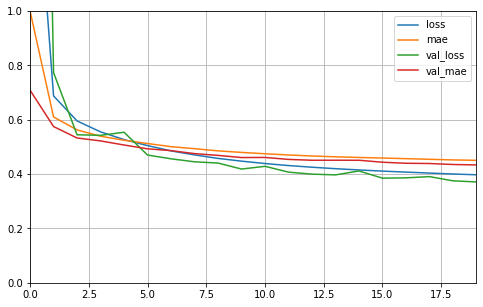

In [20]:
# plot the loss and accuracy
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [21]:
# predictions with the model data
X_new = X_test[:3]

In [23]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.52765495]
 [1.8847213 ]
 [3.3819158 ]]
[0.477   0.458   5.00001]


In [24]:
del model
keras.backend.clear_session()

#### Functional API
Not every neural network is sequential.  Some have complex topologies, with some have multiple inputs and/or multiple outputs.  There are both Wide and Deep Neural Networks. <br>
Using functions to create the layers within a neural network and then use those functions to create complexity according to your need.

In [25]:
# creating each layer, 1-by-1
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(input_)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1)            39          concatenate[0][0]            

In [27]:
# compile the model, functional API
# loss function = mean squared error for regression problem
# optimizer     = stochastic gradient descent (SGD) w/ learning rate (lr) = 1e-3
# metrics       = mae (mean absolute error)
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])

In [28]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 76us/sample - loss: 1.8459 - mae: 0.9689 - val_loss: 0.7485 - val_mae: 0.5961
Epoch 2/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.6553 - mae: 0.5871 - val_loss: 0.6262 - val_mae: 0.5625
Epoch 3/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.6023 - mae: 0.5647 - val_loss: 0.5803 - val_mae: 0.5427
Epoch 4/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5703 - mae: 0.5475 - val_loss: 0.5510 - val_mae: 0.5289
Epoch 5/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5447 - mae: 0.5347 - val_loss: 0.5424 - val_mae: 0.5177
Epoch 6/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5245 - mae: 0.5239 - val_loss: 0.5038 - val_mae: 0.5056
Epoch 7/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5071 - mae: 0.5145 - val_loss: 0.4

In [29]:
mae_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 24us/sample - loss: 0.4238 - mae: 0.4620


In [30]:
model_history.history

{'loss': [1.8458709972568055,
  0.6553334464398466,
  0.6023237559992521,
  0.5702883195815468,
  0.5446574921704489,
  0.5245398230330889,
  0.5071446386931991,
  0.49291298670772843,
  0.4808218670291802,
  0.47093681735688503,
  0.4625962803016748,
  0.4551352273791541,
  0.4488359736431066,
  0.44390934461360343,
  0.43916674650865417,
  0.4349451978796007,
  0.4316951883804377,
  0.42833183965325666,
  0.42512546780805566,
  0.42243541857992956],
 'mae': [0.96893233,
  0.58711433,
  0.56466067,
  0.54749644,
  0.53470075,
  0.52392,
  0.5144558,
  0.5065543,
  0.5000429,
  0.4942117,
  0.48907363,
  0.48557973,
  0.4809108,
  0.47830707,
  0.47570795,
  0.47327843,
  0.47112715,
  0.46895075,
  0.4667586,
  0.46518344],
 'val_loss': [0.7484555007875427,
  0.6261715594573231,
  0.5803355452780268,
  0.5510065180463692,
  0.5424113918336478,
  0.5038375337148514,
  0.4849521453682458,
  0.4767435250510233,
  0.4571843414420613,
  0.4470886703994539,
  0.4682938108379527,
  0.4395875

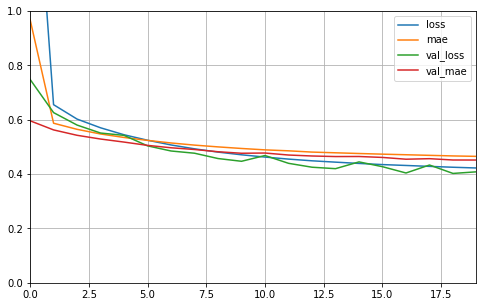

In [32]:
# plot the loss and accuracy
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

#### Saving and Restoring

In [33]:
model.save("my_first_model.h5")

In [34]:
%pwd

'C:\\Users\\stark\\Documents'